For this project, we are given data on Terry Stop arrest records. A concrete goal of the analysis of this dataset will be to determine if we can predict if the individual was arrested based on the listed features, however it should be noted that there is likely a distinct bias based on the suspect's perceived Race. Further analysis will be conducted to see how Race could affect the final outcome.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


data=pd.read_csv('Terry_Stops.csv')

data.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,46 - 55,-1,20180000001357,408984,Field Contact,None,8563,1993,M,White,...,01:34:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,-,-
1,46 - 55,-1,20180000001408,412310,Field Contact,None,8571,1995,F,White,...,22:28:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,-,-
2,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,...,01:06:00,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42566 entries, 0 to 42565
Data columns (total 23 columns):
Subject Age Group           42566 non-null object
Subject ID                  42566 non-null int64
GO / SC Num                 42566 non-null int64
Terry Stop ID               42566 non-null int64
Stop Resolution             42566 non-null object
Weapon Type                 42566 non-null object
Officer ID                  42566 non-null object
Officer YOB                 42566 non-null int64
Officer Gender              42566 non-null object
Officer Race                42566 non-null object
Subject Perceived Race      42566 non-null object
Subject Perceived Gender    42566 non-null object
Reported Date               42566 non-null object
Reported Time               42566 non-null object
Initial Call Type           42566 non-null object
Final Call Type             42566 non-null object
Call Type                   42566 non-null object
Officer Squad               42023 non-null ob

In [3]:
data['Subject Age Group'].value_counts(normalize=True)

26 - 35         0.331979
36 - 45         0.209345
18 - 25         0.204576
46 - 55         0.128788
56 and Above    0.049476
1 - 17          0.044590
-               0.031246
Name: Subject Age Group, dtype: float64

In [4]:
print(data['Subject ID'].value_counts(normalize=True))

-1              0.814147
 7726859935     0.000376
 7753260438     0.000258
 7727117712     0.000235
 7727827572     0.000188
                  ...   
 13012773265    0.000023
 8300376482     0.000023
 7732894151     0.000023
 7734813128     0.000023
 11716939786    0.000023
Name: Subject ID, Length: 6414, dtype: float64


In [5]:
print(data['GO / SC Num'].value_counts(normalize=True))

20160000378750    0.000376
20150000190790    0.000376
20180000134604    0.000329
20170000132836    0.000305
20190000441736    0.000305
                    ...   
20190000187444    0.000023
20170000461131    0.000023
20170000001974    0.000023
20190000048136    0.000023
20180000071981    0.000023
Name: GO / SC Num, Length: 33094, dtype: float64


In [7]:
data['Stop Resolution'].value_counts(normalize=True)*100

Field Contact               39.425833
Offense Report              34.313772
Arrest                      24.162477
Referred for Prosecution     1.710285
Citation / Infraction        0.387633
Name: Stop Resolution, dtype: float64

In [8]:
data['Weapon Type'].value_counts(normalize=True)

None                                 0.765047
-                                    0.178288
Lethal Cutting Instrument            0.034817
Knife/Cutting/Stabbing Instrument    0.008763
Handgun                              0.006273
Firearm Other                        0.002349
Club, Blackjack, Brass Knuckles      0.001151
Blunt Object/Striking Implement      0.001057
Firearm                              0.000493
Mace/Pepper Spray                    0.000376
Firearm (unk type)                   0.000352
Other Firearm                        0.000305
Club                                 0.000211
Rifle                                0.000141
Taser/Stun Gun                       0.000094
None/Not Applicable                  0.000094
Shotgun                              0.000070
Automatic Handgun                    0.000047
Brass Knuckles                       0.000023
Fire/Incendiary Device               0.000023
Blackjack                            0.000023
Name: Weapon Type, dtype: float64

In [9]:
print('Number of arresting officers ',data['Officer ID'].nunique())

for i in range(1,11):
    print(f'Officers with stops fewer than {i*10}: ',(data['Officer ID'].value_counts()<i*10).sum())

Number of arresting officers  1146
Officers with stops fewer than 10:  325
Officers with stops fewer than 20:  522
Officers with stops fewer than 30:  666
Officers with stops fewer than 40:  769
Officers with stops fewer than 50:  855
Officers with stops fewer than 60:  922
Officers with stops fewer than 70:  974
Officers with stops fewer than 80:  1013
Officers with stops fewer than 90:  1044
Officers with stops fewer than 100:  1058


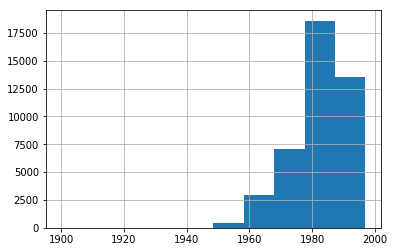

In [10]:
data['Officer YOB'].value_counts(normalize=True)

data['Officer YOB'].hist()

In [11]:
print(data['Officer YOB'].describe())

count    42566.00000
mean      1982.53242
std          8.89790
min       1900.00000
25%       1978.00000
50%       1985.00000
75%       1989.00000
max       1997.00000
Name: Officer YOB, dtype: float64


In [12]:
data['Officer Gender'].value_counts(normalize=True)

M    0.887328
F    0.112414
N    0.000258
Name: Officer Gender, dtype: float64

In [13]:
data['Officer Race'].value_counts(normalize=True)

White                            0.773834
Hispanic or Latino               0.055114
Two or More Races                0.053094
Black or African American        0.040126
Asian                            0.038434
Not Specified                    0.021825
Nat Hawaiian/Oth Pac Islander    0.010008
American Indian/Alaska Native    0.007259
Unknown                          0.000305
Name: Officer Race, dtype: float64

In [14]:
data['Subject Perceived Gender'].value_counts(normalize=True)

Male                                                         0.780834
Female                                                       0.205187
Unable to Determine                                          0.007659
-                                                            0.006014
Unknown                                                      0.000258
Gender Diverse (gender non-conforming and/or transgender)    0.000047
Name: Subject Perceived Gender, dtype: float64

In [15]:
data['Subject Perceived Race'].value_counts(normalize=True)

White                                        0.490250
Black or African American                    0.297843
Unknown                                      0.051027
Hispanic                                     0.039562
-                                            0.037166
Asian                                        0.031316
American Indian or Alaska Native             0.029507
Multi-Racial                                 0.019006
Other                                        0.003571
Native Hawaiian or Other Pacific Islander    0.000752
Name: Subject Perceived Race, dtype: float64

In [16]:
data['Reported Time'].value_counts(normalize=True)*100

19:18:00    0.119814
03:13:00    0.117465
17:00:00    0.117465
03:09:00    0.117465
02:56:00    0.117465
              ...   
07:41:23    0.002349
02:07:18    0.002349
19:41:29    0.002349
00:26:05    0.002349
16:50:37    0.002349
Name: Reported Time, Length: 8953, dtype: float64

In [18]:
data['Reported Date'].value_counts(normalize=True)

2015-10-01T00:00:00    0.002373
2015-09-29T00:00:00    0.001551
2015-05-28T00:00:00    0.001339
2015-07-18T00:00:00    0.001292
2019-04-26T00:00:00    0.001269
                         ...   
2020-05-25T00:00:00    0.000023
2015-05-06T00:00:00    0.000023
2015-03-31T00:00:00    0.000023
2015-04-28T00:00:00    0.000023
2015-05-10T00:00:00    0.000023
Name: Reported Date, Length: 1898, dtype: float64

In [20]:
print(data['Initial Call Type'].value_counts(normalize=True))
print(data['Initial Call Type'].unique())
print(data['Initial Call Type'].nunique())

-                                                 0.300756
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.064840
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.061927
DISTURBANCE, MISCELLANEOUS/OTHER                  0.051661
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)    0.041535
                                                    ...   
ESCAPE - PRISONER                                 0.000023
REQUEST TO WATCH                                  0.000023
MISSING - ADULT                                   0.000023
ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS     0.000023
UNKNOWN - ANI/ALI - PAY PHNS (INCL OPEN LINE)     0.000023
Name: Initial Call Type, Length: 161, dtype: float64
['-' 'SUSPICIOUS STOP - OFFICER INITIATED ONVIEW'
 'SHOTS - IP/JO - INCLUDES HEARD/NO ASSAULT'
 'DIST - IP/JO - DV DIST - NO ASLT'
 'NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)'
 'MVC - HIT AND RUN (NON INJURY), INCLUDES IP/JO'
 'THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)'
 'SUSPICIOUS PERSON,

In [21]:
print(data['Final Call Type'].value_counts(normalize=True))

-                                                    0.300756
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON             0.076023
--PROWLER - TRESPASS                                 0.068646
--DISTURBANCE - OTHER                                0.056266
--ASSAULTS, OTHER                                    0.047832
                                                       ...   
DUI - DRIVING UNDER INFLUENCE                        0.000023
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)    0.000023
ASSIST OTHER AGENCY - EMERGENCY SERVICE              0.000023
--CROWD MGMNT (STAND BY ONLY)                        0.000023
FIGHT - VERBAL/ORAL (NO WEAPONS)                     0.000023
Name: Final Call Type, Length: 196, dtype: float64


In [22]:
print(data['Call Type'].value_counts(normalize=True))

911                              0.435465
-                                0.300756
ONVIEW                           0.188789
TELEPHONE OTHER, NOT 911         0.068905
ALARM CALL (NOT POLICE ALARM)    0.005967
TEXT MESSAGE                     0.000047
PROACTIVE (OFFICER INITIATED)    0.000047
SCHEDULED EVENT (RECURRING)      0.000023
Name: Call Type, dtype: float64


In [23]:
print(data['Officer Squad'].value_counts(normalize=True))

TRAINING - FIELD TRAINING SQUAD                 0.107893
WEST PCT 1ST W - DAVID/MARY                     0.032197
WEST PCT 2ND W - D/M RELIEF                     0.021536
NORTH PCT 2ND WATCH - NORTH BEATS               0.021060
SOUTHWEST PCT 2ND W - FRANK                     0.020275
                                                  ...   
BURG/THEFT/JUV - WEST                           0.000024
HR - BLEA - ACADEMY RECRUITS                    0.000024
DV SQUAD D - ORDER SERVICE                      0.000024
TRAINING - ADVANCED - SQUAD C                   0.000024
COMMUNITY OUTREACH - SPECIAL PROJECTS DETAIL    0.000024
Name: Officer Squad, Length: 159, dtype: float64


In [24]:
print(data['Arrest Flag'].value_counts(normalize=True))

N    0.951205
Y    0.048795
Name: Arrest Flag, dtype: float64


In [25]:
data['Frisk Flag'].value_counts(normalize=True)

N    0.769511
Y    0.219260
-    0.011230
Name: Frisk Flag, dtype: float64

In [26]:
data['Precinct'].value_counts(normalize=True)

West         0.227036
-            0.225438
North        0.221233
East         0.133322
South        0.118310
Southwest    0.054504
SouthWest    0.014660
Unknown      0.004699
OOJ          0.000493
FK ERROR     0.000305
Name: Precinct, dtype: float64

In [28]:
data['Sector'].value_counts(normalize=True)

-         0.229831
E         0.054903
M         0.053329
N         0.051473
K         0.041395
B         0.038951
L         0.038505
D         0.035521
R         0.034182
F         0.032373
S         0.031668
U         0.030588
K         0.027933
O         0.027275
J         0.026289
G         0.025537
C         0.024362
Q         0.022718
W         0.022107
M         0.018653
D         0.016492
E         0.016281
Q         0.010901
N         0.010642
O         0.009092
F         0.008786
R         0.008434
S         0.007635
G         0.007048
U         0.006578
B         0.006531
J         0.006508
W         0.005897
C         0.005192
L         0.005145
99        0.001245
Name: Sector, dtype: float64

In [29]:
data['Beat'].value_counts(normalize=True)

-         0.228845
N3        0.027604
E2        0.025654
M2        0.020016
M3        0.018606
            ...   
N1        0.001175
C2        0.001175
OOJ       0.000446
99        0.000399
S         0.000047
Name: Beat, Length: 107, dtype: float64

In [2]:
#Clean all the data

duplicates=data[data['Terry Stop ID'].duplicated()]['Terry Stop ID']
duprows=data[data['Terry Stop ID'].isin(duplicates)].index[::2]
data.drop(duprows,inplace=True)


bins=[1899,1978,1985,1989,1998]
data['Officer Generation'] = pd.cut(data['Officer YOB'], bins)

data['Hour']=[x[:2] for x in data['Reported Time']]

data['Reported Date']=pd.to_datetime(data['Reported Date'],format='%Y-%m-%dT00:00:00')
data['Weekday']=data['Reported Date'].dt.dayofweek

data.drop('Subject ID',axis=1,inplace=True)
data.drop('GO / SC Num',axis=1,inplace=True)
data.drop('Terry Stop ID',axis=1,inplace=True)
data.drop('Officer ID',axis=1,inplace=True)
data.drop('Officer YOB',axis=1,inplace=True)
data.drop('Reported Time',axis=1,inplace=True)
data.drop('Reported Date',axis=1,inplace=True)
data.drop(['Precinct','Sector'],axis=1,inplace=True)

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42552 entries, 0 to 42565
Data columns (total 17 columns):
Subject Age Group           42552 non-null object
Stop Resolution             42552 non-null object
Weapon Type                 42552 non-null object
Officer Gender              42552 non-null object
Officer Race                42552 non-null object
Subject Perceived Race      42552 non-null object
Subject Perceived Gender    42552 non-null object
Initial Call Type           42552 non-null object
Final Call Type             42552 non-null object
Call Type                   42552 non-null object
Officer Squad               42009 non-null object
Arrest Flag                 42552 non-null object
Frisk Flag                  42552 non-null object
Beat                        42552 non-null object
Officer Generation          42552 non-null category
Hour                        42552 non-null object
Weekday                     42552 non-null int64
dtypes: category(1), int64(1), object(15

In [71]:
data.head(10)

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Beat,Officer Generation,Hour,Weekday
0,46 - 55,Field Contact,None,M,White,White,Male,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,"(1989, 1998]",01,5
1,46 - 55,Field Contact,None,F,White,Multi-Racial,Male,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,"(1989, 1998]",22,1
2,-,Arrest,None,M,Black or African American,Asian,Male,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,O2,"(1978, 1985]",11,4
3,-,Field Contact,None,M,White,-,-,-,-,-,NaN,N,N,-,"(1899, 1978]",04,2
4,-,Field Contact,None,M,Hispanic or Latino,-,-,-,-,-,WEST PCT 3RD W - MARY,N,N,-,"(1978, 1985]",01,0
5,-,Field Contact,None,M,White,-,-,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,"(1978, 1985]",19,1
6,-,Field Contact,None,M,White,-,-,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,"(1978, 1985]",19,1
7,-,Field Contact,None,M,White,American Indian or Alaska Native,Male,-,-,-,WEST PCT 3RD W - K/Q RELIEF,N,N,-,"(1899, 1978]",01,3
8,-,Field Contact,None,M,Black or African American,Unknown,Unable to Determine,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,-,"(1978, 1985]",04,4
9,-,Field Contact,None,M,White,Unknown,Unable to Determine,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,-,"(1978, 1985]",14,4


In [14]:
from sklearn.model_selection import train_test_split


y=[1 if x=='Arrest' else 0 for x in data['Stop Resolution']]

data.drop('Stop Resolution',axis=1,inplace=True)
X=pd.get_dummies(data,columns=data.columns,drop_first=True)
print(X.shape)




(42552, 711)


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,train_size=.75)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

#Takes so long that computer crashes, cannot resolve. On to next type of classiier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


DTC = DecisionTreeClassifier(criterion='entropy')

DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
test_preds = DTC.predict(X_test)

In [5]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))


In [33]:
train_preds=DTC.predict(X_train)

print('Testing data')
print_metrics(y_test,test_preds)
print('\n')
print('Training data')
print_metrics(y_train,train_preds)


#clear case of overfitting

Testing data
Precision Score: 0.6954962136309286
Recall Score: 0.6872784560850729
Accuracy Score: 0.8535438992291784
F1 Score: 0.6913629160063391


Training data
Precision Score: 0.9993497203797633
Recall Score: 0.992764857881137
Accuracy Score: 0.9980886131478348
F1 Score: 0.9960464061183486


In [16]:
DTC_gini=DecisionTreeClassifier(criterion='gini')
DTC_gini.fit(X_train,y_train)

test_preds_gini=DTC_gini.predict(X_test)
train_preds_gini=DTC_gini.predict(X_train)

print('testing data\n')
print_metrics(y_test,test_preds_gini)
print('testing data\n')
print_metrics(y_train,train_preds_gini)
#Not great. Clearly overfit

testing data

Precision Score: 0.7005627009646302
Recall Score: 0.6864907443875542
Accuracy Score: 0.8551419439744313
F1 Score: 0.6934553411577483
testing data

Precision Score: 0.9993497203797633
Recall Score: 0.992764857881137
Accuracy Score: 0.9980886131478348
F1 Score: 0.9960464061183486


In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid={'criterion':['entropy','gini'],
           'max_depth':[None,2,3,5],
           'min_samples_split':[2,5,10],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [None, 2, 3, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

#oh hell yea

Mean Training Score: 85.68%
Mean Test Score: 85.91%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [22]:
DTC_Best=DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=2,min_samples_split=10)

DTC_Best.fit(X_train,y_train)

test_preds_Best=DTC_Best.predict(X_test)
train_preds_Best=DTC_Best.predict(X_train)

print('testing data\n')
print_metrics(y_test,test_preds_Best)
print('testing data\n')
print_metrics(y_train,train_preds_Best)
#Its good but could be better. Next step is random forests

testing data

Precision Score: 0.7334821428571429
Recall Score: 0.6471051595116187
Accuracy Score: 0.8596540703139688
F1 Score: 0.6875915463486084
testing data

Precision Score: 0.9190207156308852
Recall Score: 0.8196382428940568
Accuracy Score: 0.9387416180986401
F1 Score: 0.8664891074233421


In [24]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagged_tree =  BaggingClassifier(DTC_Best, n_estimators=20)
bagged_tree.fit(X_train, y_train)
print(bagged_tree.score(X_train,y_train))
print(bagged_tree.score(X_test,y_test))
#only slightly better. Not worthwhile

0.9492072444695118
0.8766685467193082


In [25]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.7575985460926239
0.7614213197969543


In [30]:
forest_grid={'criterion':['gini','entropy'],
            'n_estimators':[10,25,50,100],
            'max_depth':[None,5],
            'min_samples_leaf': [2],
            'min_samples_split': [10]}

rf_grid_search = GridSearchCV(RandomForestClassifier(), forest_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [10, 25, 50, 100], 'max_depth': [None, 5], 'min_samples_leaf': [2], 'min_samples_split': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")


Training Accuracy: 86.62%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [37]:
RFC_Best=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 2, 
                                min_samples_split= 10, n_estimators= 100)

RFC_Best.fit(X_train,y_train)

test_preds_RFC=RFC_Best.predict(X_test)
train_preds_RFC=RFC_Best.predict(X_train)

print('testing data\n')
print_metrics(y_test,test_preds_RFC)
print('training data\n')
print_metrics(y_train,train_preds_RFC)

testing data

Precision Score: 0.8179871520342612
Recall Score: 0.601811736904293
Accuracy Score: 0.873002444068434
F1 Score: 0.6934422509643748
training data

Precision Score: 0.9247345903977182
Recall Score: 0.7540051679586564
Accuracy Score: 0.9254559127655574
F1 Score: 0.8306882072450359


In [7]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


In [9]:
from xgboost import XGBClassifier

XGB=XGBClassifier()
XGB.fit(X_train,y_train)

test_preds_XGB=XGB.predict(X_test)
train_preds_XGB=XGB.predict(X_train)

In [48]:
print('testing data\n')
print_metrics(y_test,test_preds_XGB)
print('training data\n')
print_metrics(y_train,train_preds_XGB)

testing data

Precision Score: 0.8322903629536921
Recall Score: 0.5238282788499409
Accuracy Score: 0.861158112427148
F1 Score: 0.6429780033840947
training data

Precision Score: 0.8413441955193482
Recall Score: 0.5337209302325582
Accuracy Score: 0.862505483486871
F1 Score: 0.6531225296442688


In [49]:
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

grid_clf = GridSearchCV(XGBClassifier(), param_grid_xgb, scoring='accuracy', cv=None)
grid_clf.fit(X_train, y_train)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [6], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.7], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
best_parameters = grid_clf.best_params_

training_preds_xgb = grid_clf.predict(X_train)
test_preds_xgb = grid_clf.predict(X_test)

print('testing data\n')
print_metrics(y_test,test_preds_xgb)
print('training data\n')
print_metrics(y_train,training_preds_xgb)

#This is the best one!
print(best_parameters)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


testing data

Precision Score: 0.7662278710848842
Recall Score: 0.6648286727057897
Accuracy Score: 0.8715924045873285
F1 Score: 0.7119358920286798
training data

Precision Score: 0.8295116140559857
Recall Score: 0.7197674418604652
Accuracy Score: 0.8961584257692549
F1 Score: 0.7707526286662977
{'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.7}


C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [8]:
from xgboost import XGBClassifier
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


XGB=XGBClassifier(learning_rate= 0.2, max_depth= 6, min_child_weight= 2, n_estimators= 100, subsample= 0.7)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=6, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [11]:
test_preds_XGB=XGB.predict(X_test)
train_preds_XGB=XGB.predict(X_train)

print('testing data\n')
print_metrics(y_test,test_preds_XGB)
print('training data\n')
print_metrics(y_train,train_preds_XGB)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


testing data

Precision Score: 0.7662278710848842
Recall Score: 0.6648286727057897
Accuracy Score: 0.8715924045873285
F1 Score: 0.7119358920286798
training data

Precision Score: 0.8295116140559857
Recall Score: 0.7197674418604652
Accuracy Score: 0.8961584257692549
F1 Score: 0.7707526286662977


<Figure size 1080x1080 with 0 Axes>

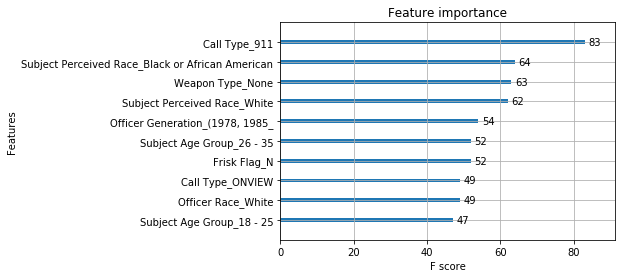

In [24]:
from xgboost import plot_importance
plt.figure(figsize=(15,15))
plot_importance(XGB,max_num_features=10)
plt.show()

# print(XGB.feature_importances_)

The most important predictor for whether or not an arrest was made is if it was in response to a 911 class -- this makes total sense because one would expect that most people calling the police are truly endangered, as opposed to officers making routine traffic stops.

Unfortunately, subject's perceived race is an important indicator of arrest likelihood. Further analysis will follow regarding the extent. It appears that white officers born in the late 70s and early 80s (this is, the oldest and most experienced officers) are most willing to make arrests. Arrests appear to be unlikely if no weapon is found. Younger people are most likely to be arrested. Interestingly enough, subject's perceived gender is not on the list.

In [41]:
X['Arrest']=y

Black=X[X['Subject Perceived Race_Black or African American']==1]
White=X[X['Subject Perceived Race_White']==1]

print(sum(Black.Arrest)/len(Black.index))
print(sum(White.Arrest)/len(White.index))

#White people are slightly less likely to be arrested during a stop

0.2698011991164405
0.23274209012464045


In [47]:
#Lets switch around the races, keep everything else the same, and see what happens

Black['Subject Perceived Race_Black or African American']=0
Black['Subject Perceived Race_White']=1

White['Subject Perceived Race_Black or African American']=1
White['Subject Perceived Race_White']=0


C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [51]:
Blacky=Black.Arrest
BlackX=Black.drop('Arrest',axis=1)

Whitey=White.Arrest
WhiteX=White.drop('Arrest',axis=1)

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

BlackX.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in BlackX.columns.values]
WhiteX.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in WhiteX.columns.values]


Black_pred=XGB.predict(BlackX)
print(sum(Black_pred)/len(Black_pred))

White_pred=XGB.predict(WhiteX)
print(sum(White_pred)/len(White_pred))

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.23264436730829915
0.2059443911792905


C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Well that is odd! All else being equal, a black person who was mistaken to be a white person was 4 points less likely to be arrested - this conforms with the understanding that black people are subject to racist treatment. 

However, a white person mistaken as being black is ALSO 3 points less likely to be arrested!

In [56]:
Women=X[X['Subject Perceived Gender_Female']==1]
Men=X[X['Subject Perceived Gender_Male']==1]
BlackWomen=Women[Women['Subject Perceived Race_Black or African American']==1]
BlackMen=Men[Men['Subject Perceived Race_Black or African American']==1]

print('Probability of Woman arrest: ',sum(Women.Arrest)/len(Women.Arrest))
print('Probability of Man arrest: ',sum(Men.Arrest)/len(Men.Arrest))
print('Probability of Black Woman arrest: ',sum(BlackWomen.Arrest)/len(BlackWomen.Arrest))
print('Probability of Black Man arrest: ',sum(BlackMen.Arrest)/len(BlackMen.Arrest))

Probability of Woman arrest:  0.228355474118186
Probability of Man arrest:  0.24662151993980436
Probability of Black Woman arrest:  0.2653061224489796
Probability of Black Man arrest:  0.2707874844512487


In [71]:
Worst=X[(X['Subject Perceived Race_Black or African American']==1) &
  (X['Officer Generation_(1978, 1985]']==1) &
  (X['Subject Perceived Gender_Male']==1) &
  ((X['Subject Age Group_26 - 35']==1)| X['Subject Age Group_18 - 25']==1) &
 (X['Officer Race_White']==1)]

print(sum(Worst.Arrest)/len(Worst.index))

0.2778249787595582
